# B) Predicting features which determine the severity of traffic accidents using GridSearch

## Grid Serach Decision Tree

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree_param_grid = {
    'max_depth' : [ 7,9],
    'min_samples_leaf' : [2, 5],
    'min_samples_split' : [2, 5 ],
    'class_weight' : ['balanced']
}

In [72]:
dtree_grids = GridSearchCV(estimator= DecisionTreeClassifier(), 
                          param_grid=dtree_param_grid, scoring = 'recall')

In [73]:
dtree_grids.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [7, 9],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring='recall')

In [74]:
dtree_grids.best_params_

{'class_weight': 'balanced',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [75]:
dtree_grid_results_test = dtree_grids.predict(X_test)

In [76]:
print(classification_report(y_test, dtree_grid_results_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     38236
           1       0.86      0.76      0.81     20829

    accuracy                           0.87     59065
   macro avg       0.87      0.85      0.86     59065
weighted avg       0.87      0.87      0.87     59065



In [77]:
best_dtree = dtree_grids.best_estimator_


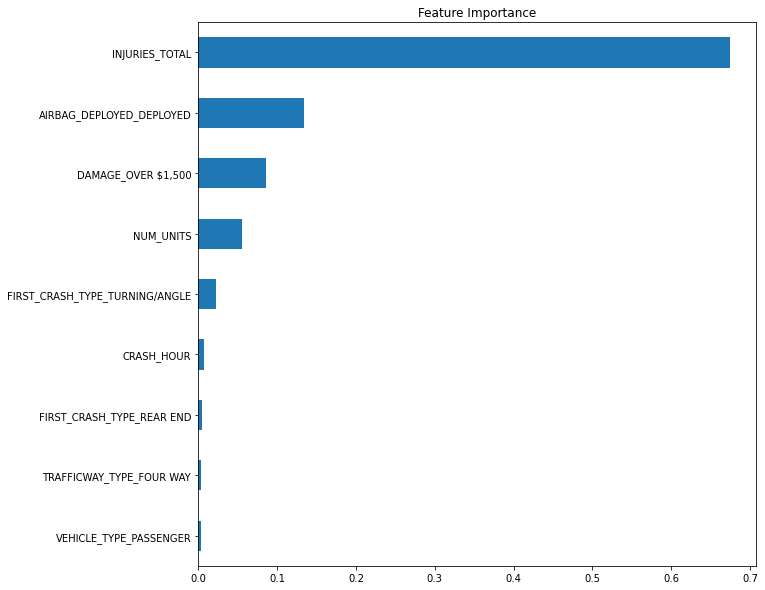

In [78]:
importance = pd.Series(best_dtree.feature_importances_ ,index=X_train.columns)
importance.sort_values().tail(9).plot(kind='barh', figsize=(10,10), title = 'Feature Importance');

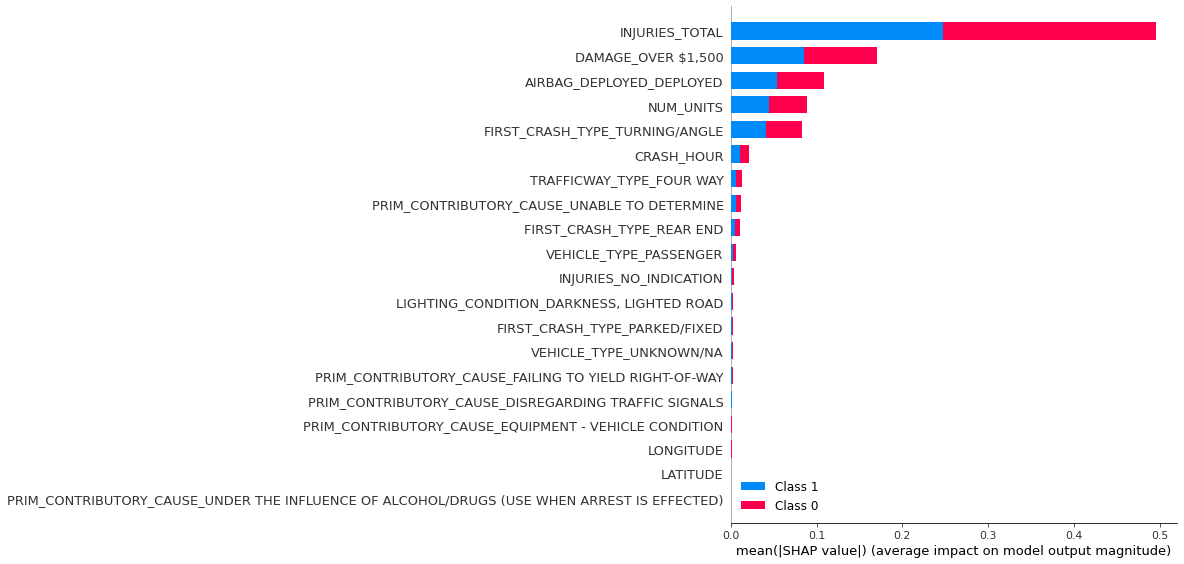

In [79]:
import shap 
Train_shap = shap.sample(X_train,10000)
TreeExplainer = shap.TreeExplainer(best_dtree)
shap_values = TreeExplainer.shap_values(Train_shap)
shap.summary_plot(shap_values, Train_shap, plot_type="bar");

### VISULIZATION TO EXPLAIN THE IMPORTANCE OF THE PARAMETER CHOSEN FOR THE RISK SCORE

In [80]:
pd.DataFrame(severity_accident.groupby(['INJURIES_FATAL','SEVERE']).CRASH_RECORD_ID.count())

CRASH_RECORD_ID
INJURIES_FATAL SEVERE                 
0.0            0                152787
               1                 82926
1.0            1                   497
2.0            1                    48

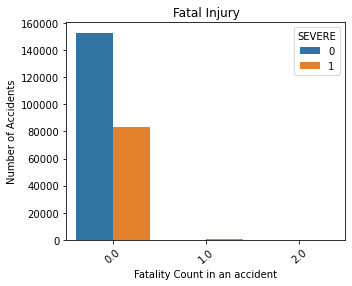

In [81]:
# counter plot of Fatal Injuries
plt.figure(figsize=(5,4))
sns.countplot(x="INJURIES_FATAL", data=severity_accident_clean, hue="SEVERE")
plt.title('Fatal Injury')
plt.xlabel('Fatality Count in an accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);

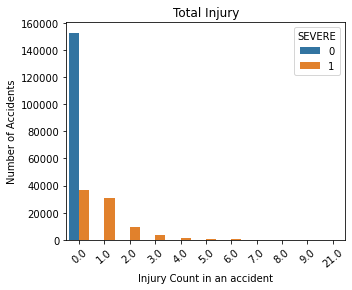

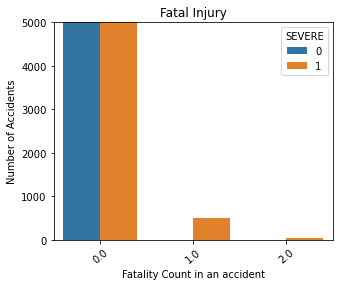

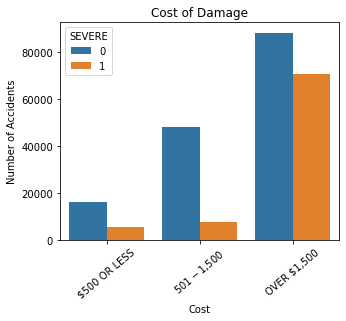

In [82]:
# counter plot of Total Injuries
plt.figure(figsize=(5,4))
sns.countplot(x="INJURIES_TOTAL", data=severity_accident_clean, hue="SEVERE")
plt.title('Total Injury')
plt.xlabel('Injury Count in an accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);
# counter plot of Fatal Injuries
plt.figure(figsize=(5,4))
sns.countplot(x="INJURIES_FATAL", data=severity_accident_clean, hue="SEVERE")
plt.title('Fatal Injury')
plt.xlabel('Fatality Count in an accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);
plt.ylim(0,5000);

# DAMAGE VS SEVERITY
plt.figure(figsize=(5,4))
sns.countplot(x="DAMAGE", data=severity_accident_clean, hue="SEVERE")
plt.title('Cost of Damage')
plt.xlabel('Cost')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);


In [83]:
pd.DataFrame(severity_accident.groupby(['INJURIES_TOTAL','SEVERE']).CRASH_RECORD_ID.count())

CRASH_RECORD_ID
INJURIES_TOTAL SEVERE                 
0.0            0                152787
               1                 36643
1.0            1                 30842
2.0            1                  9628
3.0            1                  3557
4.0            1                  1658
5.0            1                   610
6.0            1                   325
7.0            1                    99
8.0            1                    70
9.0            1                    18
21.0           1                    21

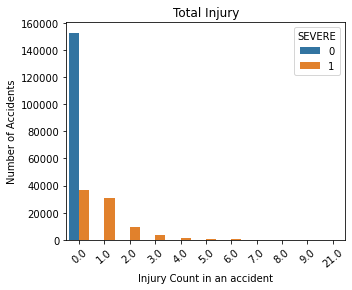

In [84]:
# counter plot of Total Injuries
plt.figure(figsize=(5,4))
sns.countplot(x="INJURIES_TOTAL", data=severity_accident_clean, hue="SEVERE")
plt.title('Total Injury')
plt.xlabel('Injury Count in an accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);

In [85]:
pd.DataFrame(severity_accident.groupby(['DAMAGE','SEVERE']).CRASH_RECORD_ID.count())

CRASH_RECORD_ID
DAMAGE        SEVERE                 
$500 OR LESS  0                 16228
              1                  5225
$501 - $1,500 0                 48131
              1                  7580
OVER $1,500   0                 88428
              1                 70666

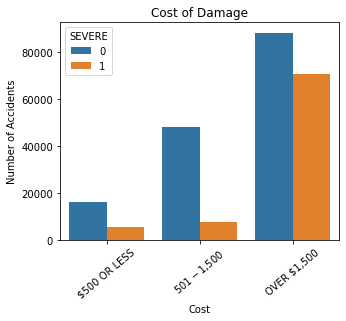

In [86]:
# DAMAGE VS SEVERITY

plt.figure(figsize=(5,4))
sns.countplot(x="DAMAGE", data=severity_accident_clean, hue="SEVERE")
plt.title('Cost of Damage')
plt.xlabel('Cost')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40);